In [2]:
## Classification Algorithms
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
# For K-Means Clustering
from sklearn.cluster import KMeans
# For Silhouette Analysis
from sklearn.metrics import silhouette_samples, silhouette_score

# For PCA
from sklearn.decomposition import PCA 

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.cross_validation import train_test_split
from scipy.stats import zscore



# calculate accuracy measures and confusion matrix
from sklearn import metrics
# To enable plotting graphs in Jupyter notebook
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline 

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
names = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [4]:
df = pd.read_csv("steel.txt", sep = '\t', header=None, names = names)

In [5]:
from xlsxwriter.utility import xl_rowcol_to_cell
conditions=[(df['Pastry'] == 1) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0), (df['Pastry'] == 0) & (df['Z_Scratch'] == 1)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 1)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 1)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 1)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 1)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 1)]
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['class'] = np.select(conditions, choices)

drp_cols=['TypeOfSteel_A400','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df.drop(choices, inplace=True,axis = 1)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


## 1. EDA

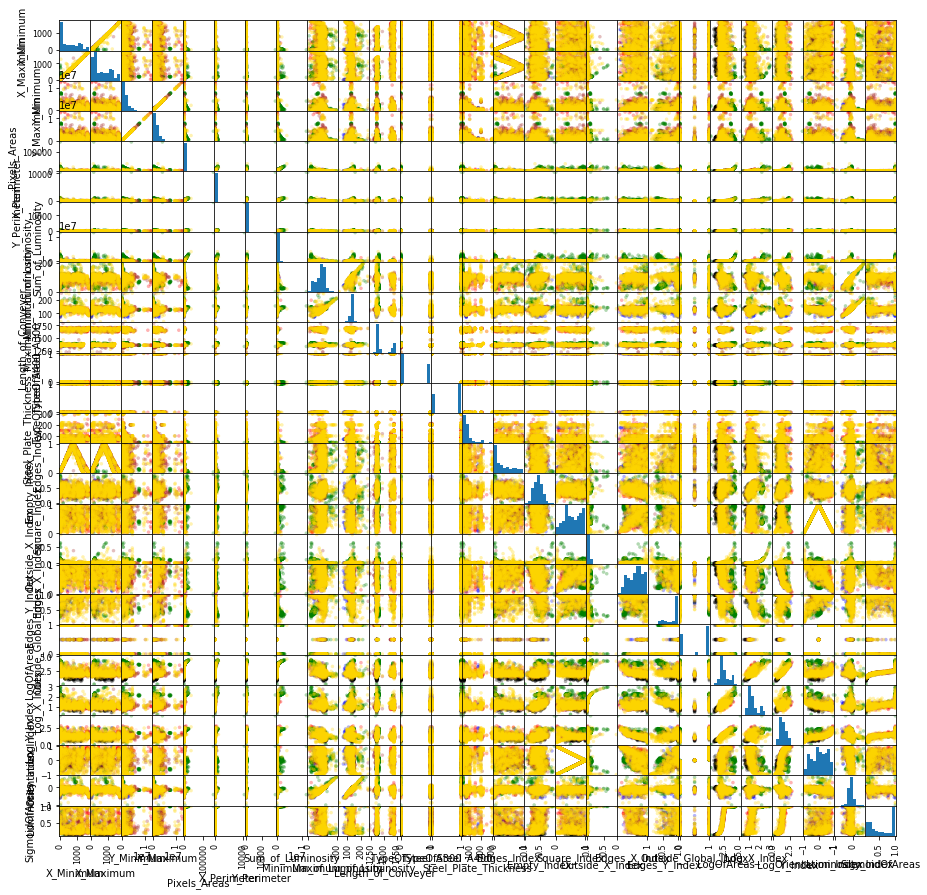

In [22]:
## Coloring the Outcomes
color_code = {'Pastry':'Red', 'Z_Scratch':'Blue', 'K_Scatch':'Green', 'Stains':'Black', 'Dirtiness':'Pink', 'Bumps':'Brown', 'Other_Faults':'Gold'}
color_list = [color_code.get(i) for i in df.loc[:,'class']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.3,
                                       s = 50)
plt.show()

### 1.1 Count plot to show the number of Defects belonging to each Defect Type

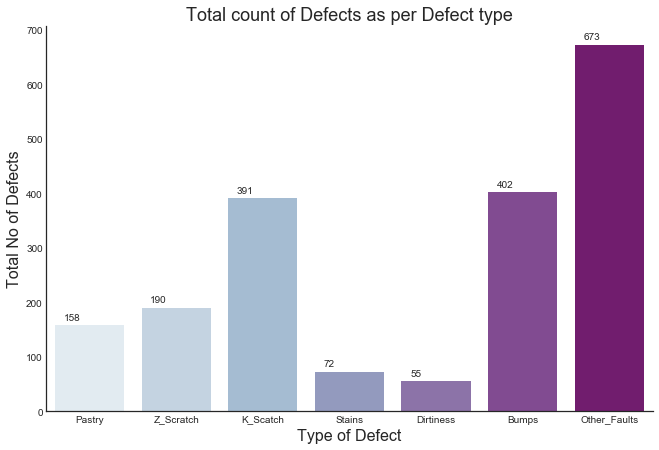

In [10]:

sns.set_style("white")
g = sns.factorplot(x="class", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Type of Defect",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total No of Defects", fontdict= {'size':16})
g.ax.set_title("Total count of Defects as per Defect type",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10))

We can expect the model to be biased towards 'Other_Faults','Bumps' and 'K_Scratch' as they are high in proportion.

In [8]:
## Only Non-categorical columns
df.describe().columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

### 1.2 Visual analysis of the correlation between the Factors

In [11]:
corr = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']].corr()

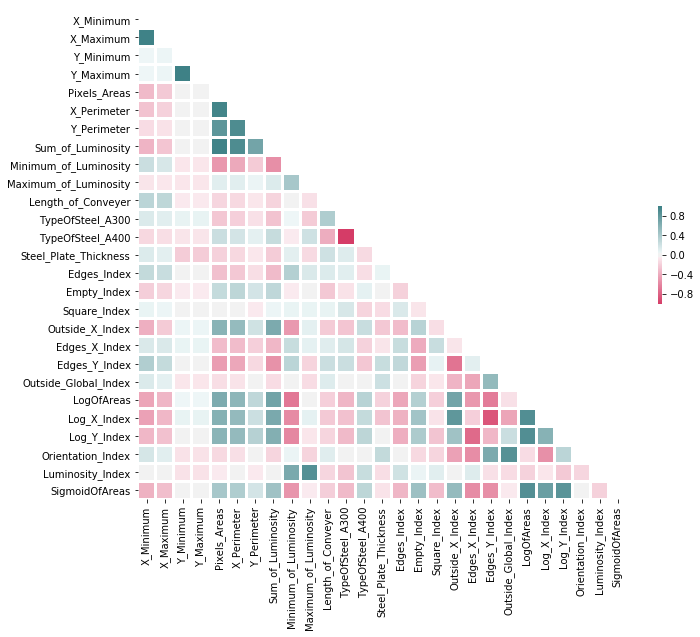

In [12]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1,200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .2}, annot  = False)


### 1.3 Correlation Matrix

In [11]:
display(df.corr())

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


#### $NOTE$ : 'TypeOfSteel_A400' is redundant as it's the opposite of 'TypeOfSteel_A300'

### 1.4 Clustering

#### 1.4.1 __Standardizing the Data before Clustering__

In [19]:
df_z = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']].apply(zscore)

#### 1.4.2 __Finding Error for each cluster__

In [20]:
cluster_range = range( 2, 15) 
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
    # Use scaled data in the fit() function.
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

print(clusters_df)

    num_clusters  cluster_errors
0              2    38811.769106
1              3    34328.705852
2              4    30177.216737
3              5    27715.457366
4              6    25947.951411
5              7    24572.468784
6              8    22903.245358
7              9    21539.092502
8             10    20489.733187
9             11    19592.891989
10            12    18873.187787
11            13    18166.880037
12            14    17530.875814


#### 1.4.3 __Elbow Plot__

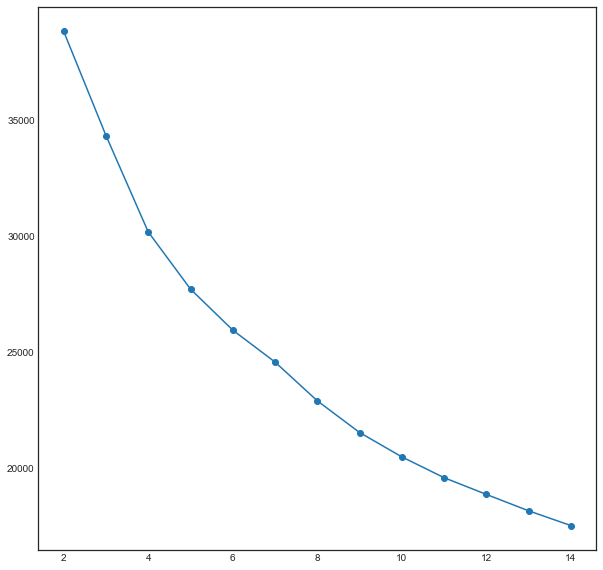

In [21]:
plt.figure(figsize=(10,10))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

_It is still unclear what cluster number is the best. Hence, we shall go forward with Silhouette Analysis_

#### 1.4.4 Silhouette Analysis

For n_clusters = 2 The average silhouette_score is : 0.31191262712241896


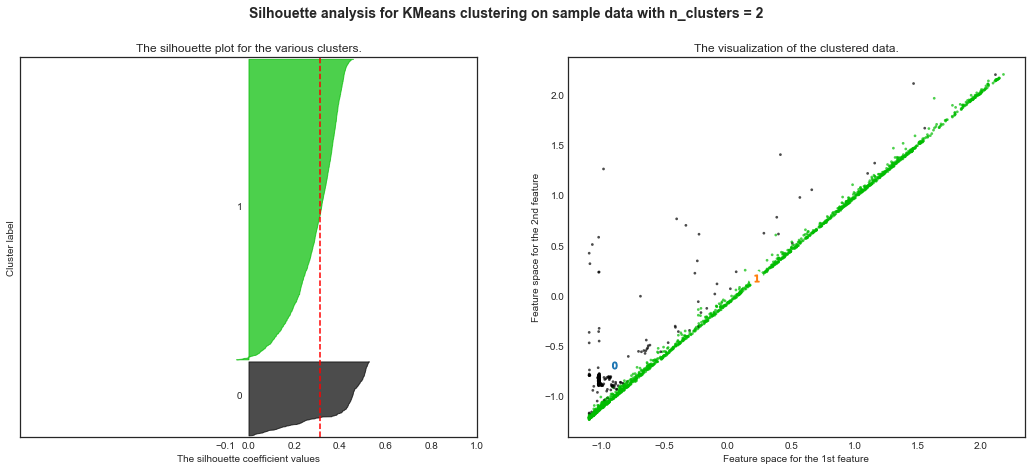

For n_clusters = 3 The average silhouette_score is : 0.19464142811539867


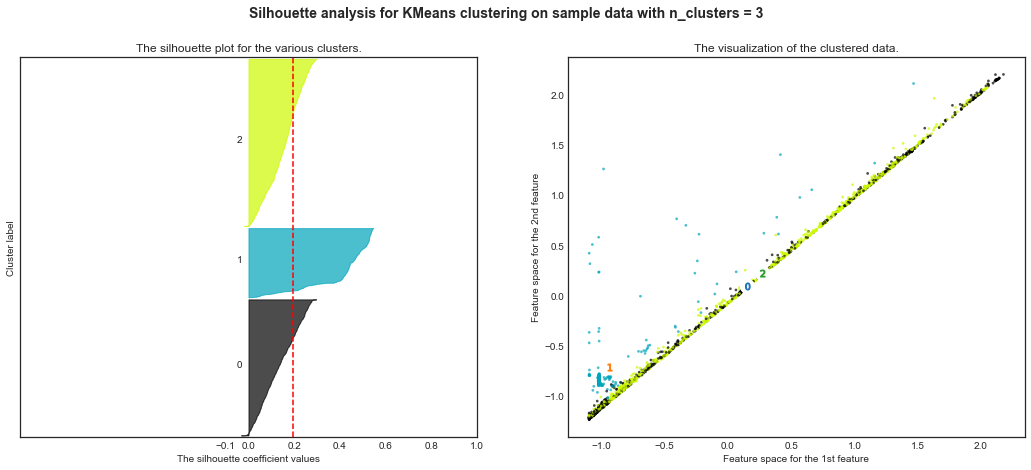

For n_clusters = 4 The average silhouette_score is : 0.18254869753193512


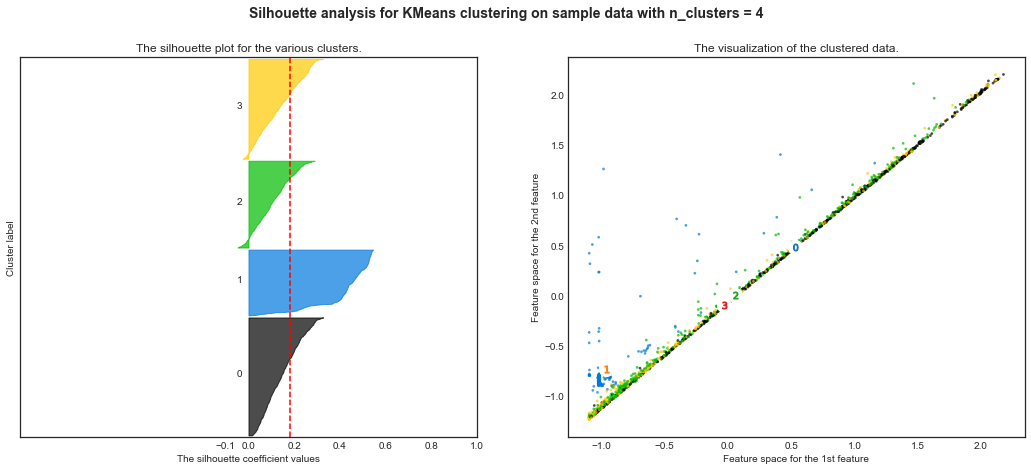

For n_clusters = 5 The average silhouette_score is : 0.1903729113613477


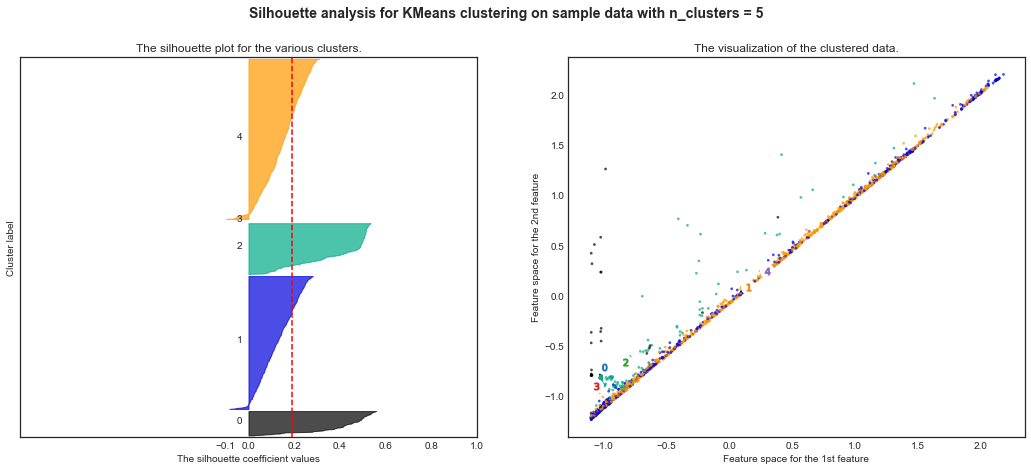

For n_clusters = 6 The average silhouette_score is : 0.18490718696636926


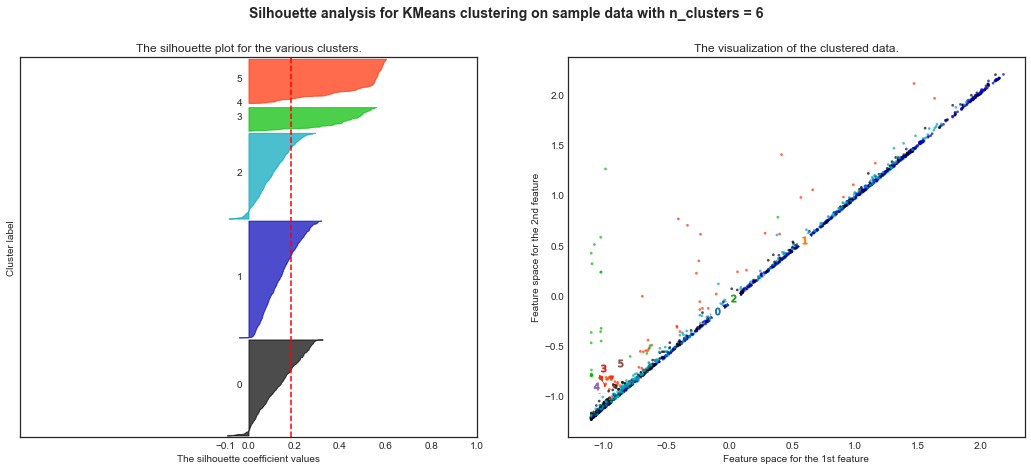

For n_clusters = 7 The average silhouette_score is : 0.19217375628334868


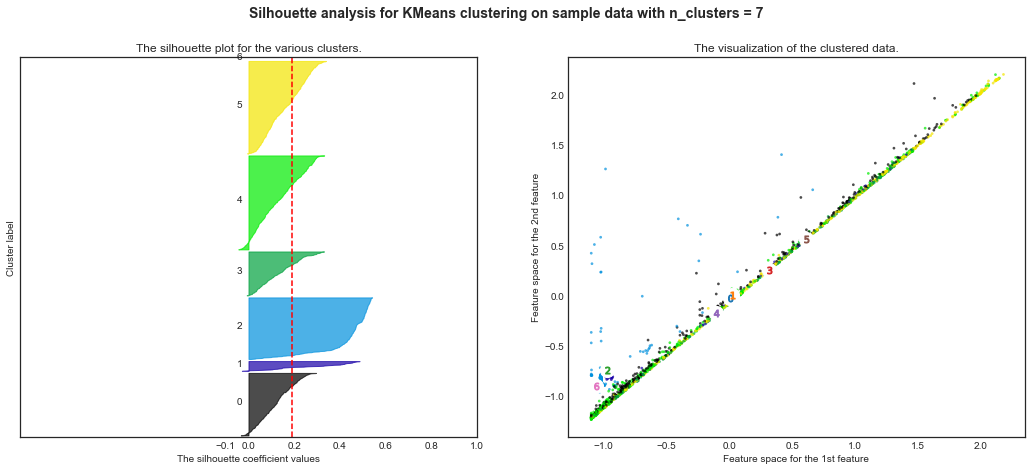

For n_clusters = 8 The average silhouette_score is : 0.2012481873129015


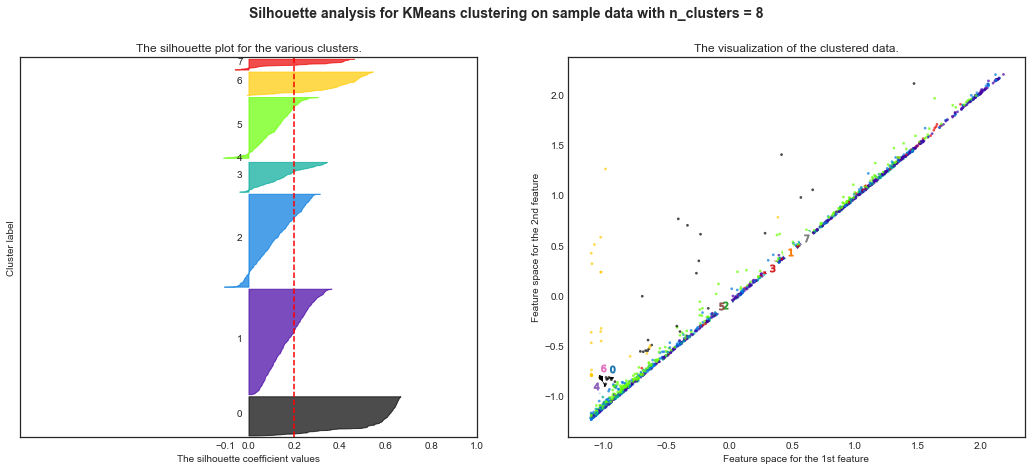

For n_clusters = 9 The average silhouette_score is : 0.2028462191978425


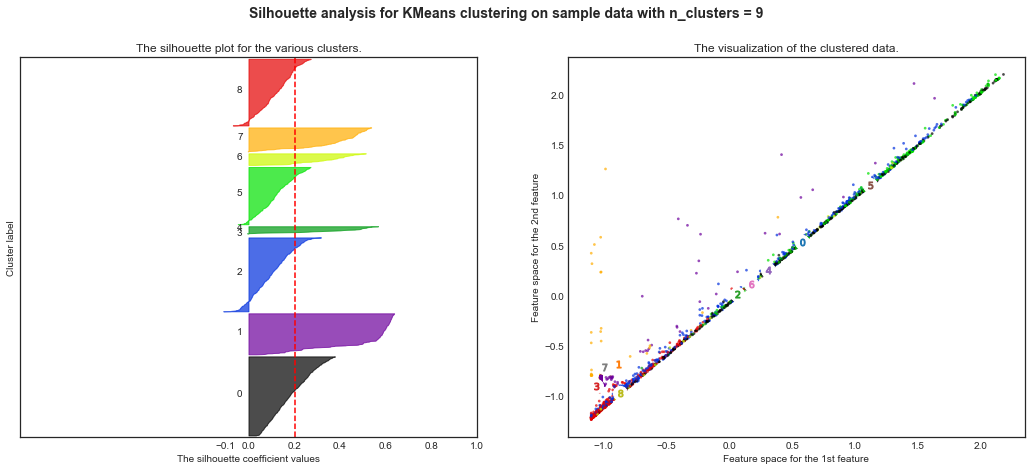

For n_clusters = 10 The average silhouette_score is : 0.19990930329415918


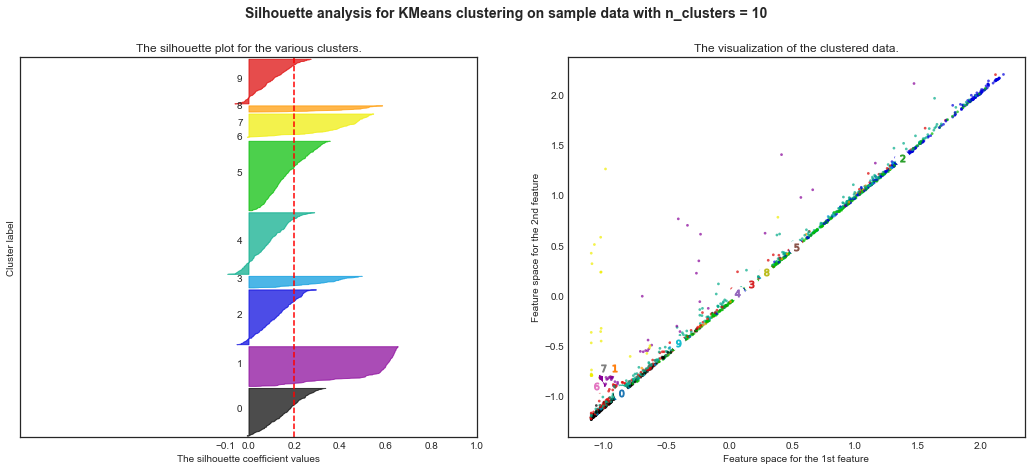

For n_clusters = 11 The average silhouette_score is : 0.20013249137059982


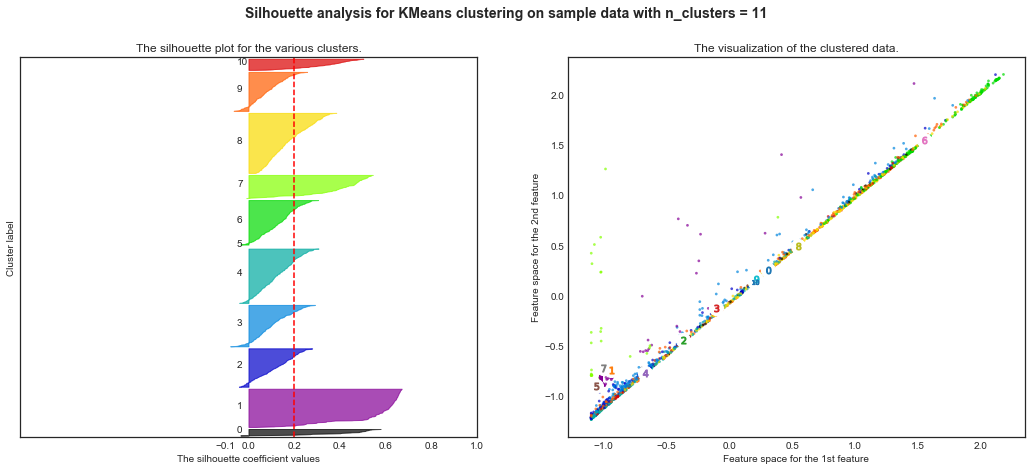

For n_clusters = 12 The average silhouette_score is : 0.20504072662215214


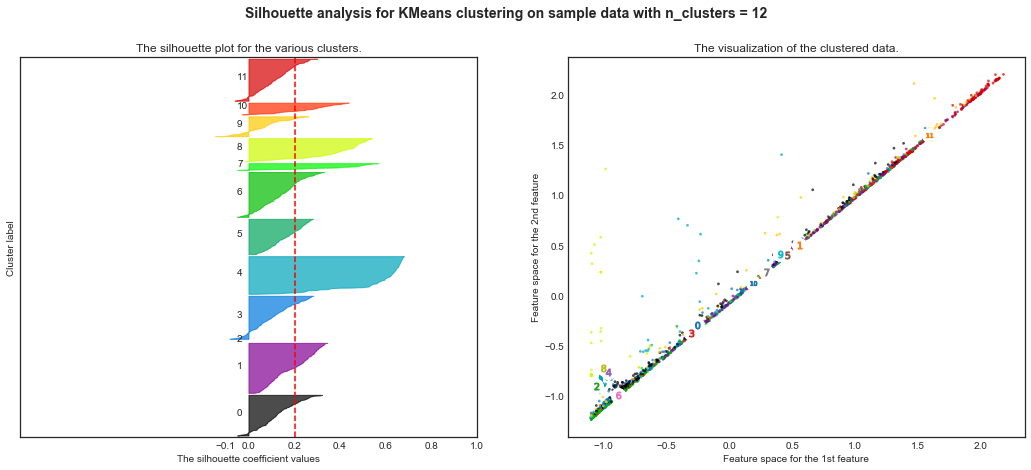

For n_clusters = 13 The average silhouette_score is : 0.2056002944310713


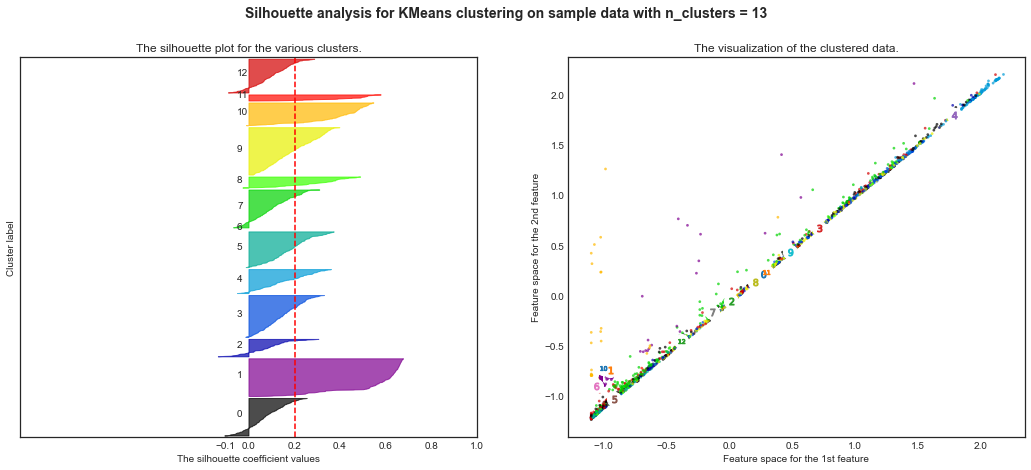

For n_clusters = 14 The average silhouette_score is : 0.21062959800814351


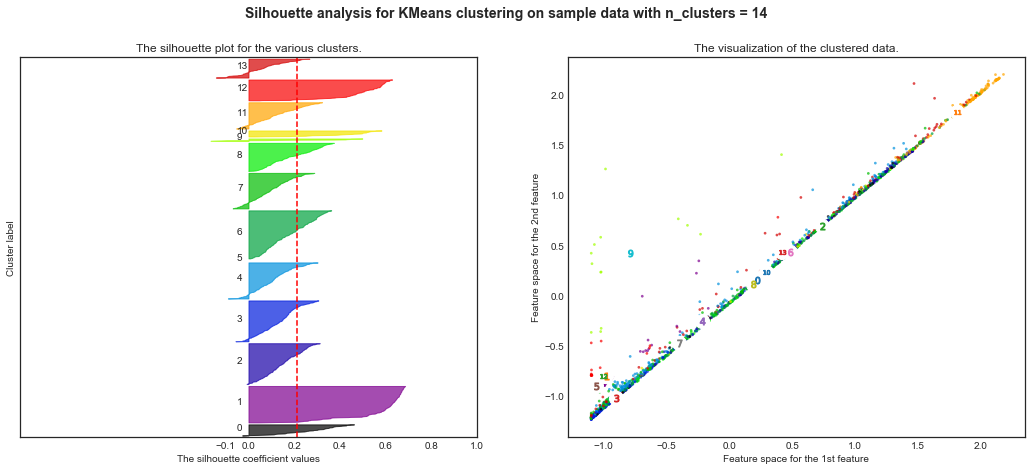

In [22]:
cluster_range = range( 2, 15 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(df_z) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( df_z )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(df_z, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(df_z, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = plt.cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(df_z.values[:, 0], df_z.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

    Cluster =2 shows the highest 'Sihouette Coefficient', lets analyze the same.

   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0  -1.016481  -1.141639  -0.777729  -0.777729     -0.314852    -0.314996   
1   0.141894   0.066403   0.500188   0.500171     -0.345623    -0.338242   
2   0.495362   0.436253  -0.054546  -0.054566     -0.352784    -0.344883   
3   0.541467   0.486504  -0.722225  -0.722225     -0.332463    -0.328279   
4   1.379032   1.382988  -0.649678  -0.649559      0.099692    -0.172201   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0    -0.091389          -0.355537              -0.266099   
1    -0.124225          -0.380574              -0.017079   
2    -0.150024          -0.387261               0.449832   
3    -0.089044          -0.365736               0.449832   
4     0.415209           0.079307              -1.480069   

   Maximum_of_Luminosity  ...    Edges_X_Index  Edges_Y_Index  \
0              -1.187708  ...        -0.575331       0.796401   
1              -0.384975  ...        -0.043290      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198A70F4F28>,
      dtype=object)

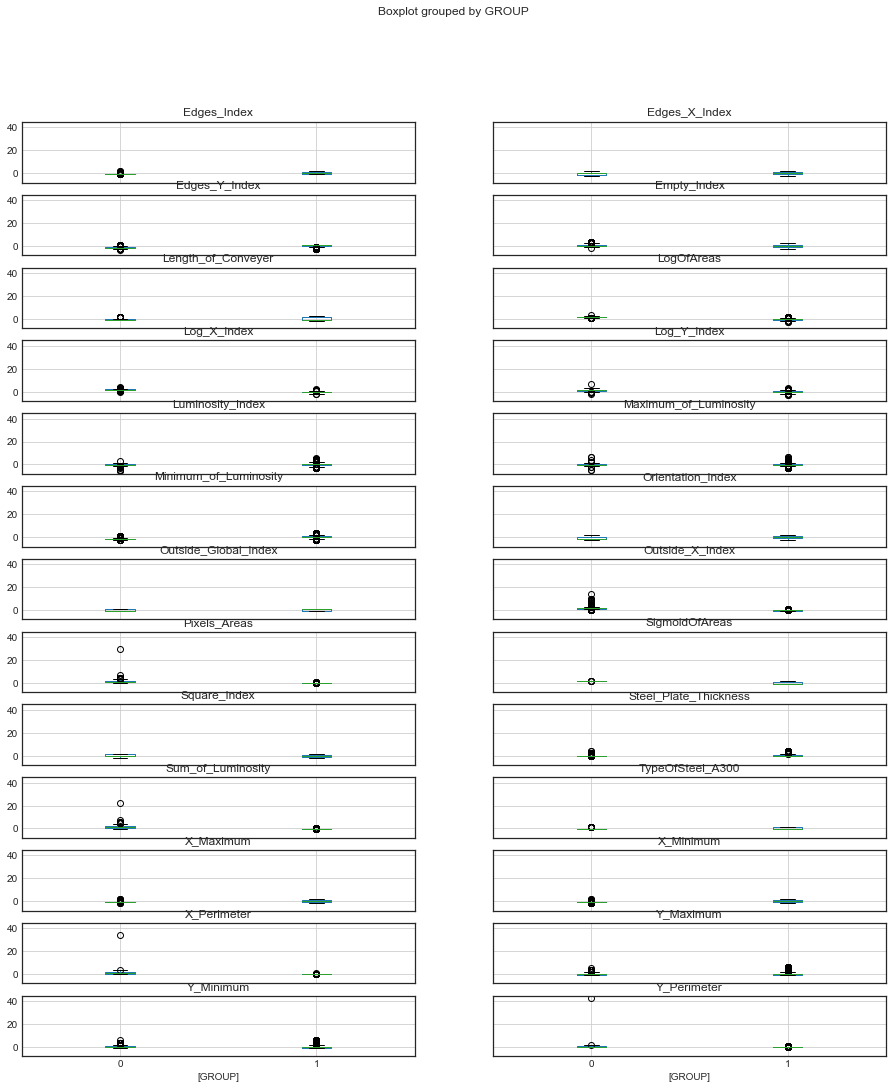

In [23]:
cluster = KMeans( n_clusters = 2, random_state = 100 )
cluster.fit(df_z)
        # To get the values of Centroid
centroids = cluster.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
    #print(centroid_df)
prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction
print(df_z.head())

        ## Observing the Clusters
df_z.boxplot(by = 'GROUP',layout=(15,2) ,figsize=(15, 20))

__We cannot make concrete conclusions based on cluster analysis__

# 2. Model Development and Classification

## 2.1 Data Preparation

In [9]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['class']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =1, stratify = y)

In [26]:
## Normalization

x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [28]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,...,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03
mean,-5.880176e-17,-1.716840e-17,4.864379e-17,7.332336e-17,-1.355588e-17,-3.038449e-17,5.356182e-18,1.466467e-18,1.442145e-16,-3.983068e-16,...,-1.303367e-16,-5.708492e-17,-1.730431e-16,1.251862e-16,5.227777e-16,-3.436183e-16,3.662591e-17,1.101639e-17,1.176035e-16,5.207747e-17
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,...,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00
min,-1.088906e+00,-1.224704e+00,-9.311520e-01,-9.311682e-01,-3.507202e-01,-3.435531e-01,-1.763080e-01,-3.919739e-01,-2.647958e+00,-5.026234e+00,...,-5.669336e-01,-2.501633e+00,-3.206979e+00,-1.160003e+00,-2.763171e+00,-2.150918e+00,-3.061040e+00,-2.094173e+00,-5.895129e+00,-1.365812e+00
25%,-9.919739e-01,-8.471459e-01,-6.741165e-01,-6.740999e-01,-3.358565e-01,-3.031699e-01,-1.509437e-01,-3.748848e-01,-6.587325e-01,-3.379156e-01,...,-4.770644e-01,-7.740283e-01,-9.477897e-01,-1.160003e+00,-7.185383e-01,-7.057120e-01,-6.920435e-01,-8.744709e-01,-4.251109e-01,-1.000863e+00
50%,-2.988334e-01,-3.042782e-01,-2.387872e-01,-2.388073e-01,-3.198918e-01,-2.658932e-01,-1.255794e-01,-3.562236e-01,1.603605e-01,-1.762494e-01,...,-4.136274e-01,1.035380e-01,5.731027e-01,9.022246e-01,-3.251793e-01,-3.416195e-01,-1.586240e-01,3.297919e-02,-1.160030e-02,-2.548046e-01
75%,9.262181e-01,9.064596e-01,2.916699e-01,2.916719e-01,-2.046981e-01,-9.504134e-02,-2.985317e-03,-2.425218e-01,6.908207e-01,5.243039e-01,...,-1.757383e-01,7.750598e-01,8.076703e-01,9.022246e-01,5.232973e-01,3.931818e-01,7.418231e-01,8.580598e-01,4.455360e-01,1.222326e+00
max,2.233102e+00,2.259037e+00,6.289125e+00,6.289059e+00,2.766149e+01,3.210898e+01,3.818931e+01,2.156229e+01,3.686361e+00,6.613729e+00,...,1.034777e+01,1.609248e+00,8.076703e-01,9.022246e-01,3.406614e+00,3.302201e+00,6.287410e+00,1.831643e+00,5.247249e+00,1.222914e+00


##### The below function 'modelEval' is created for the following purpose:
         1. To fit the model
         2. To find the predicted class.
         2. To showcase the model's confusion matrix.
         3. To Evaluate the model's accuracy
         4. To Report models' Precision, recall and F-1 Score.

In [13]:
def modelEval(model):
    
    model.fit(x_train, y_train)
    print("\nBest Parameters :",model.best_params_)
    predicted = model.predict(x_test)
    cMatrix = confusion_matrix(y_test, predicted)
    print("\n",cMatrix)
    print("\nModel Accuracy :", round(model.score(x_test,y_test)*100,3))
    print(metrics.classification_report(y_test, predicted))
    

## 2.2 Model Development

### 2.2.1 Logistic Regression

For Logistic Regression, an experimentation on HyperParameters 'penalty', 'C', 'tol' and 'solver' was performed. The following parameters attained the best accuracy. Results in the table below:

* **penalty** : l1(Outperforms l2)
* **C** : 0.5( Best amongst 0.01,0.1,0.5,0.9,1,5,10)
* **tol** : 1e-2(Best amongst 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2)
* **solver** : liblinear is the only algorithm that can be used with both 'l1' and 'l2'


In [30]:
lm = LogisticRegression()
params = { 'penalty': ['l1','l2'],'C': [0.01,0.1,0.5,0.9,1,5,10], 'tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'solver': ['liblinear']}
GSLR = GridSearchCV(lm, params, cv=10)

In [31]:
modelEval(GSLR)


Best Parameters : {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}

 [[49  0  0 29  1  0  2]
 [ 0  5  0  6  0  0  0]
 [ 3  0 69  4  2  0  0]
 [31  0  8 85  7  0  4]
 [ 2  0  0 17 12  0  1]
 [ 0  0  0  0  0 14  0]
 [ 2  0  0  7  0  0 29]]

Model Accuracy : 67.609
              precision    recall  f1-score   support

       Bumps       0.56      0.60      0.58        81
   Dirtiness       1.00      0.45      0.62        11
    K_Scatch       0.90      0.88      0.89        78
Other_Faults       0.57      0.63      0.60       135
      Pastry       0.55      0.38      0.44        32
      Stains       1.00      1.00      1.00        14
   Z_Scratch       0.81      0.76      0.78        38

 avg / total       0.68      0.68      0.68       389



### 2.2.2 KNN

For KNN, an experimentation on parameters 'k', 'weights' and 'algorithm' was performed.The following parameters attained the best accuracy. Results in the table below:

* **k** : 5(Best amongst 1 to 59)
* **weights** : distance( Best amongst uniform and distance)
* **algorithm** : auto(Best amongst 'auto', 'ball_tree', 'kd_tree', 'brute')


In [32]:
knn = KNeighborsClassifier()
k = np.arange(1, 60)
parameters = { 'n_neighbors': k, 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }
GSKnn = GridSearchCV(knn, parameters, cv=10)

In [33]:
modelEval(GSKnn)


Best Parameters : {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

 [[49  1  0 23  3  0  5]
 [ 0 10  0  1  0  0  0]
 [ 2  0 72  4  0  0  0]
 [24  1  6 87  8  1  8]
 [ 4  0  0 13 13  0  2]
 [ 0  0  0  0  0 14  0]
 [ 0  0  0  4  1  0 33]]

Model Accuracy : 71.465
              precision    recall  f1-score   support

       Bumps       0.62      0.60      0.61        81
   Dirtiness       0.83      0.91      0.87        11
    K_Scatch       0.92      0.92      0.92        78
Other_Faults       0.66      0.64      0.65       135
      Pastry       0.52      0.41      0.46        32
      Stains       0.93      1.00      0.97        14
   Z_Scratch       0.69      0.87      0.77        38

 avg / total       0.71      0.71      0.71       389



### 2.2.3 Naïve Bayes

In [34]:
nb = GaussianNB()

In [35]:
nb.fit(x_train, y_train)

GaussianNB(priors=None)

In [36]:
y_test_naive = nb.predict(x_test)

In [37]:
print(confusion_matrix(y_test, y_test_naive))
print("\n\n The Accuracy is :",round(nb.score(x_test, y_test)*100,2))
print(metrics.classification_report(y_test, y_test_naive))

[[ 8  1  0 34 33  0  5]
 [ 0  2  0  1  8  0  0]
 [ 0  0  0 77  1  0  0]
 [11  4  0 68 40  0 12]
 [ 0  1  0  3 27  0  1]
 [ 0  0  0 14  0  0  0]
 [ 0  1  0  4  3  0 30]]


 The Accuracy is : 34.7
              precision    recall  f1-score   support

       Bumps       0.42      0.10      0.16        81
   Dirtiness       0.22      0.18      0.20        11
    K_Scatch       0.00      0.00      0.00        78
Other_Faults       0.34      0.50      0.40       135
      Pastry       0.24      0.84      0.38        32
      Stains       0.00      0.00      0.00        14
   Z_Scratch       0.62      0.79      0.70        38

 avg / total       0.29      0.35      0.28       389



### 2.2.4 Decision Trees

For Decision Trees, an experimentation on parameters 'splitting criteria', 'minimum samples required to split', 'max depth of the tree', 'minimum samples required at the leaf level' and the 'maximum features' to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

*	**Splitting criteria:** Entropy (Using Entropy marginally outperformed Gini Index with a higher accuracy.)
*	**Min samples required to split:** 10 (Best amongst 2,5,10,15.)
*	**Max Depth:** None(Performs better than 'auto', 'log2' and 'sqrt'.)
*   **Maximum Features** : None (Performs better than 'auto','sqrt', 'log2')
*	**Min samples required at leaf:**  3 (Best amongst 1,3,10,15.)

In [74]:
dt = DecisionTreeClassifier()
parameters = { 'criterion': ['gini', 'entropy'],'min_samples_split':[2,5,10,15] ,'max_depth': [None, 'auto', 'log2' ,'sqrt'], 'min_samples_leaf': [1,3,10,15], 'max_features': [None, 'auto','sqrt', 'log2' ]  }
GSDT = GridSearchCV(dt, parameters, cv=10)

In [75]:
modelEval(GSDT)


Best Parameters : {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 10}

 [[ 79   0   2  35   4   0   1]
 [  1  10   0   3   3   0   0]
 [  2   1 110   2   0   2   0]
 [ 43   3   9 133  10   1   3]
 [ 12   2   0  13  20   0   0]
 [  0   0   0   3   0  19   0]
 [  1   0   0   6   1   0  49]]

Model Accuracy : 72.041
              precision    recall  f1-score   support

       Bumps       0.57      0.65      0.61       121
   Dirtiness       0.62      0.59      0.61        17
    K_Scatch       0.91      0.94      0.92       117
Other_Faults       0.68      0.66      0.67       202
      Pastry       0.53      0.43      0.47        47
      Stains       0.86      0.86      0.86        22
   Z_Scratch       0.92      0.86      0.89        57

 avg / total       0.72      0.72      0.72       583



### 2.2.5 Random Forest

For the random forests classifier, I experimented with the number of trees, splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

*	**Num estimators:** 200 (Best amongst 10,50,100,200)
*	**Splitting criteria:** Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)
*	**Min samples required to split:** 1% (Best amongst 1%, 10% and 5%.)
*	**Min samples required at leaf:**  0.1 % (Best amongst 1%, 5% and 0.1%.)
*	**Max features:** None (Performs better than 'auto', 'log2' and 'sqrt'.)


In [14]:
rf = RandomForestClassifier()
parameters = { 'n_estimators': [10,50,100,200],'criterion': ['gini', 'entropy'],'min_samples_split':[2,5,10,15] ,'max_depth': [None, 2], 'min_samples_leaf': [1,3,10,15], 'max_features': [None, 'auto','sqrt', 'log2' ]  }
GSRF = GridSearchCV(rf, parameters, cv=10)

In [15]:
modelEval(GSRF)


Best Parameters : {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

 [[ 52   0   0  24   5   0   0]
 [  0   9   0   2   0   0   0]
 [  1   0  74   3   0   0   0]
 [ 14   0   1 109   7   1   3]
 [  1   0   0  12  19   0   0]
 [  0   0   0   0   0  14   0]
 [  0   0   0   6   0   0  32]]

Model Accuracy : 79.434
              precision    recall  f1-score   support

       Bumps       0.76      0.64      0.70        81
   Dirtiness       1.00      0.82      0.90        11
    K_Scatch       0.99      0.95      0.97        78
Other_Faults       0.70      0.81      0.75       135
      Pastry       0.61      0.59      0.60        32
      Stains       0.93      1.00      0.97        14
   Z_Scratch       0.91      0.84      0.88        38

 avg / total       0.80      0.79      0.79       389



# 3. Principal Component Analysis

_By performing PCA, we are trying to reduce the number of Dimensions into a few less dimensions that are able to explain Variance in the actual dimensions_ 

## 3.1 PCA Transformation

### 3.1.1 Obtain CoVariance Matrix

In [42]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['class']

x_std = x.apply(zscore)

In [43]:
cov_x = np.cov(x_std, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_x)

Covariance matrix of X: 
[[ 1.00051546  0.98882298  0.04184286  0.04182806 -0.30748017 -0.25907085
  -0.11881858 -0.33922016  0.23775965 -0.07559329  0.31682565  0.14439387
   0.1366955   0.27821823 -0.19856315  0.06369067 -0.36134567  0.15485794
   0.36809705  0.14735768 -0.42877375 -0.4381696  -0.32701902  0.17867743
  -0.03159404 -0.35543441]
 [ 0.98882298  1.00051546  0.05217423  0.05216203 -0.22551547 -0.1864221
  -0.09018414 -0.24717941  0.16873643 -0.06242372  0.2995446   0.1120666
   0.10617355  0.24297152 -0.15275894  0.04860005 -0.21504119  0.14933563
   0.27205496  0.09930405 -0.33234036 -0.32417881 -0.26612721  0.11507868
  -0.03901625 -0.28688375]
 [ 0.04184286  0.05217423  1.00051546  1.00051544  0.01767887  0.02385546
   0.02416253  0.007366   -0.06573645 -0.06782004 -0.04923614  0.07520237
  -0.20774745  0.02132517 -0.04313938 -0.00613804  0.0541925   0.06611902
  -0.03656203 -0.06294377  0.04497497  0.07044258 -0.00844633 -0.08654149
  -0.09070026  0.02527011]
 [ 0.041

### 3.1.2 Obtain EigenVectors and EigenValues

In [44]:
eigenval, eigenvec = np.linalg.eig(cov_x)

In [45]:
print("Eigen Values for the Variables are :", eigenval.round(2))

Eigen Values for the Variables are : [8.17 3.41 2.46 2.22 1.88 1.57 1.08 0.99 0.92 0.76 0.68 0.49 0.39 0.29
 0.24 0.19 0.1  0.06 0.06 0.04 0.01 0.01 0.   0.   0.   0.  ]


In [46]:
pd.DataFrame(eigenval).transpose()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,8.170895,3.413767,2.460189,2.221901,1.876332,1.568108,1.081102,0.98746,0.921876,0.75506,...,0.099661,0.059317,0.055544,0.044798,0.011965,0.007009,0.001365,0.000492,0.000013,2.937127e-11


In [47]:
tot = sum(eigenval)
var_exp = [( i /tot ) * 100 for i in sorted(eigenval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 31.41032725  44.53343534  53.99082767  62.5321974   69.74514256
  75.77321961  79.92916255  83.72513045  87.26897967  90.17156175
  92.79378152  94.6598836   96.14496486  97.27862023  98.1981238
  98.92299897  99.30611493  99.53413998  99.74766085  99.91987305
  99.96586912  99.99281468  99.99806116  99.99995172 100.
 100.        ]


### 3.1.3 Plot EigenValues

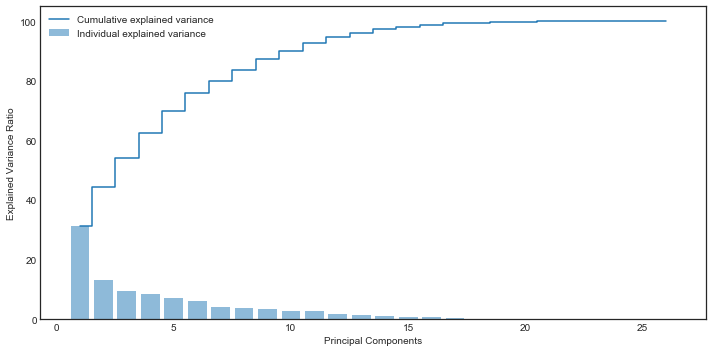

In [48]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenval.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenval.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

_Since, first 11 EigenValues have a value of greater than 0.5 and are able to account for 92.8% Variance. We Shall go with the given 11 Dimensions in the future modelling_

## 3.2 Dimension reduction to Principal Components

In [19]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['class']

__Splitting the Data into Train and Test with 30% data in the Test Set__

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10, stratify =y)

x_train_std = x_train.apply(zscore)
x_test_std = x_test.apply(zscore)

### 3.2.1 Reduction of Dimension

In [21]:
x_train_reduced = PCA(n_components=11).fit_transform(x_train_std)
x_test_reduced = PCA(n_components=11).fit_transform(x_test_std)

##### The below function 'PCAmodelEval' is created for the following purpose:
         1. To fit the model
         2. To find the predicted class.
         2. To showcase the model's confusion matrix.
         3. To Evaluate the model's accuracy
         4. To Report models' Precision, recall and F-1 Score.

In [22]:
def PCAmodelEval(model):
    
    model.fit(x_train_reduced, y_train)
    print("\nBest Parameters :",model.best_params_)
    predicted = model.predict(x_test_reduced)
    cMatrix = confusion_matrix(y_test, predicted)
    print("\n",cMatrix)
    print("\nModel Accuracy :", round(model.score(x_test_reduced,y_test)*100,3))
    print(metrics.classification_report(y_test, predicted))
    

## 3.3 Modelling and Classification

### 3.3.1 Logistic Regression

For Logistic Regression, an experimentation on HyperParameters 'penalty', 'C', 'tol' and 'solver' was performed. The following parameters attained the best accuracy. Results in the table below:

* **penalty** : l2(Outperforms l1)
* **C** : 5( Best amongst 0.01,0.1,0.5,0.9,1,5,10)
* **tol** : 1e-4(Best amongst 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2)
* **solver** : liblinear is the only algorithm that can be used with both 'l1' and 'l2'


In [62]:
lm = LogisticRegression()
params = { 'penalty': ['l1','l2'],'C': [0.01,0.1,0.5,0.9,1,5,10], 'tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'solver': ['liblinear']}
GSLR = GridSearchCV(lm, params, cv=10)

In [63]:
PCAmodelEval(GSLR)


Best Parameters : {'C': 5, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}

 [[ 26   1   6  56   8   2  22]
 [  6   0   0   1   8   2   0]
 [  6   0 101   1   1   8   0]
 [ 68   5  16  82  15   5  11]
 [ 10   3   0  17  10   3   4]
 [ 22   0   0   0   0   0   0]
 [ 28   0   2  27   0   0   0]]

Model Accuracy : 37.564
              precision    recall  f1-score   support

       Bumps       0.16      0.21      0.18       121
   Dirtiness       0.00      0.00      0.00        17
    K_Scatch       0.81      0.86      0.83       117
Other_Faults       0.45      0.41      0.42       202
      Pastry       0.24      0.21      0.22        47
      Stains       0.00      0.00      0.00        22
   Z_Scratch       0.00      0.00      0.00        57

 avg / total       0.37      0.38      0.37       583



### 3.3.2 K Nearest Neighbor

For KNN, an experimentation on parameters 'k', 'weights' and 'algorithm' was performed.The following parameters attained the best accuracy. Results in the table below:

* **k** : 7(Best amongst 1 to 59)
* **weights** : distance( Best amongst uniform and distance)
* **algorithm** : auto(Best amongst 'auto', 'ball_tree', 'kd_tree', 'brute')


In [64]:
knn = KNeighborsClassifier()
k = np.arange(1, 60)
parameters = { 'n_neighbors': k, 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }
GSKnn = GridSearchCV(knn, parameters, cv=10)

In [65]:
PCAmodelEval(GSKnn)


Best Parameters : {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

 [[ 42   4   6  42   6   0  21]
 [  5   0   0   3   8   1   0]
 [  8   0  97  10   0   2   0]
 [ 59   0   9 100  15   2  17]
 [ 11   1   0  18  12   1   4]
 [  6   0   0  10   0   6   0]
 [ 18   0   2  24   2   1  10]]

Model Accuracy : 45.798
              precision    recall  f1-score   support

       Bumps       0.28      0.35      0.31       121
   Dirtiness       0.00      0.00      0.00        17
    K_Scatch       0.85      0.83      0.84       117
Other_Faults       0.48      0.50      0.49       202
      Pastry       0.28      0.26      0.27        47
      Stains       0.46      0.27      0.34        22
   Z_Scratch       0.19      0.18      0.18        57

 avg / total       0.46      0.46      0.45       583



### 3.3.3 Naïve Bayes

    It is to be noted that accuracy of the Naïve Bayes model increases on reduced dimensions.

In [78]:
nb = GaussianNB()
nb.fit(x_train_reduced, y_train)
y_test_naive = nb.predict(x_test_reduced)
print(confusion_matrix(y_test, y_test_naive))
print("\n\n The Accuracy is :",round(nb.score(x_test_reduced, y_test)*100,2))
print(metrics.classification_report(y_test, y_test_naive))


[[ 49   3   1  50   4   0  14]
 [  6   0   0   2   9   0   0]
 [  3   0 102  12   0   0   0]
 [ 70   5   4  96  16   0  11]
 [  9   0   3  28   4   0   3]
 [ 11   0   2   9   0   0   0]
 [ 13   0   1  40   1   0   2]]


 The Accuracy is : 43.4
              precision    recall  f1-score   support

       Bumps       0.30      0.40      0.35       121
   Dirtiness       0.00      0.00      0.00        17
    K_Scatch       0.90      0.87      0.89       117
Other_Faults       0.41      0.48      0.44       202
      Pastry       0.12      0.09      0.10        47
      Stains       0.00      0.00      0.00        22
   Z_Scratch       0.07      0.04      0.05        57

 avg / total       0.40      0.43      0.41       583



### 3.3.4 Decision Trees

For Decision Trees, an experimentation on parameters 'splitting criteria', 'minimum samples required to split', 'max depth of the tree', 'minimum samples required at the leaf level' and the 'maximum features' to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

*	**Splitting criteria:** Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)
*	**Min samples required to split:** 2 (Best amongst 2,5,10,15.)
*	**Max Depth:** None
*	**Min samples required at leaf:**  1 (Best amongst 1,3,10,15.)
*	**Max features:** None (Performs better than 'auto', 'log2' and 'sqrt'.)

In [79]:
dt = DecisionTreeClassifier()
parameters = { 'criterion': ['gini', 'entropy'],'min_samples_split':[2,5,10,15] ,'max_depth': [None, 2], 'min_samples_leaf': [1,3,10,15], 'max_features': [None, 'auto','sqrt', 'log2' ]  }
GSDT = GridSearchCV(dt, parameters, cv=10)

In [80]:
PCAmodelEval(GSDT)


Best Parameters : {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

 [[23  3  9 54 12  8 12]
 [ 2  0  1  4  8  2  0]
 [ 2  0 79 18 15  2  1]
 [38  5 17 92 27 12 11]
 [ 6  2  4 20 12  2  1]
 [ 2  0  0  9  8  3  0]
 [13  8  3 28  4  1  0]]

Model Accuracy : 35.849
              precision    recall  f1-score   support

       Bumps       0.27      0.19      0.22       121
   Dirtiness       0.00      0.00      0.00        17
    K_Scatch       0.70      0.68      0.69       117
Other_Faults       0.41      0.46      0.43       202
      Pastry       0.14      0.26      0.18        47
      Stains       0.10      0.14      0.12        22
   Z_Scratch       0.00      0.00      0.00        57

 avg / total       0.35      0.36      0.35       583



### 3.3.5 Random Forest

For the random forests classifier, I experimented with the number of trees, splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

*	**Num estimators:** 200 (Best amongst 10,50,100,200)
*	**Splitting criteria:** Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)
*	**Min samples required to split:** 2 (Best amongst 2,5,10,15.)
*	**Min samples required at leaf:**  1(Best amongst 1,3,10,15.)
*	**Max features:** None (Performs better than 'auto', 'log2' and 'sqrt'.)

In [27]:
rf = RandomForestClassifier(n_estimators=200)
parameters = { 'criterion': ['gini', 'entropy'],'min_samples_split':[2,5,10,15] ,'max_depth': [None, 2], 'min_samples_leaf': [1,3,10,15], 'max_features': [None, 'auto','sqrt', 'log2' ]  }
GSRF = GridSearchCV(rf, parameters, cv=10)

In [28]:
PCAmodelEval(GSRF)


Best Parameters : {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

 [[ 16   0   2  89   3   0  11]
 [  2   0   0   7   8   0   0]
 [  1   0  95  19   0   2   0]
 [ 32   0   5 146  13   0   6]
 [  7   0   0  32   5   1   2]
 [  6   0   0  16   0   0   0]
 [  1   0   0  56   0   0   0]]

Model Accuracy : 44.94
              precision    recall  f1-score   support

       Bumps       0.25      0.13      0.17       121
   Dirtiness       0.00      0.00      0.00        17
    K_Scatch       0.93      0.81      0.87       117
Other_Faults       0.40      0.72      0.51       202
      Pastry       0.17      0.11      0.13        47
      Stains       0.00      0.00      0.00        22
   Z_Scratch       0.00      0.00      0.00        57

 avg / total       0.39      0.45      0.40       583

